In [1]:
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 6))
pd.reset_option('precision')
pd.set_option('chop_threshold', 0)
import sys

In [2]:
from IPython.display import display, HTML

CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

# 180626 시험대비

# 1. groupby 356,537p

In [15]:
df=DataFrame({'key1':['a','a','b','b','a'],
             'key2':['one','two','one','two','one'],
             'data1':np.random.randn(5),
             'data2':np.random.randn(5)})

1. df를 'key1'을 기준으로 묶어라
2. 1에서 묶은 groupby 객체에 data1의 범위를 구하는 사용자 함수를 적용하라.

In [16]:
df

,data1,data2,key1,key2
0,-0.643503,-0.359641,a,one
1,1.182009,-0.139803,a,two
2,-2.242556,1.513535,b,one
3,-0.636398,-0.362351,b,two
4,-1.623361,1.109707,a,one


In [17]:
grouped=df.groupby('key1')

In [18]:
def myrange(arr):
    return arr.max()-arr.min()

In [19]:
grouped['data1'].agg(myrange)

key1
a    2.805370
b    1.606158
Name: data1, dtype: float64

# 2. 버킷(?) 368p

In [20]:
df

,data1,data2,key1,key2
0,-0.643503,-0.359641,a,one
1,1.182009,-0.139803,a,two
2,-2.242556,1.513535,b,one
3,-0.636398,-0.362351,b,two
4,-1.623361,1.109707,a,one


In [21]:
bins=[-1,0,1]

myrange를 통해 데이터 평균을 구하라

In [23]:
df['myrange']=pd.cut(df.data2, bins)

In [24]:
df

,data1,data2,key1,key2,myrange
0,-0.643503,-0.359641,a,one,"(-1, 0]"
1,1.182009,-0.139803,a,two,"(-1, 0]"
2,-2.242556,1.513535,b,one,NaN
3,-0.636398,-0.362351,b,two,"(-1, 0]"
4,-1.623361,1.109707,a,one,NaN


In [28]:
df['data2'].groupby(df.myrange).mean() #외부 칼럼을 색인한 것이라 가능하다.

myrange
(-1, 0]   -0.287265
(0, 1]          NaN
Name: data2, dtype: float64

In [26]:
df.groupby('myrange').agg('mean')

,data1,data2
myrange,,
"(-1, 0]",-0.032631,-0.287265
"(0, 1]",NaN,NaN


# 3. 피봇테이블 377p

In [45]:
%pwd

'C:\\AIPython_2'

In [46]:
tips=pd.read_csv('ch08/tips.csv')

In [47]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2


In [48]:
tip_pct=tips.tip/tips.total_bill*100

In [49]:
tip_pct

0       5.944673
1      16.054159
2      16.658734
3      13.978041
4      14.680765
5      18.623962
         ...    
238    13.033771
239    20.392697
240     7.358352
241     8.822232
242     9.820426
243    15.974441
Length: 244, dtype: float64

In [50]:
tips['tip_pct']=tips.tip/tips.total_bill*100

In [51]:
tips.pivot_table('tip_pct',index=['sex','day'],columns='smoker',aggfunc='sum')

smoker               No         Yes
sex    day                         
Female Fri    33.059181  146.390382
       Sat   192.391507  245.725092
       Sun   231.993889   94.829892
       Thur  389.928665  114.150799
Male   Fri    27.600995  115.784196
       Sat   518.822952  375.480382
       Sun   680.649887  260.945709
       Thur  331.412703  164.416764

# 4.  시계열 리샘플링 425p

In [53]:
rng=pd.date_range('1/1/2000',periods=100,freq='D')

In [57]:
ts=Series(randn(len(rng)), index=rng)
ts

2000-01-01    0.874550
2000-01-02   -1.808866
2000-01-03    1.001363
2000-01-04   -0.305984
2000-01-05    0.447735
2000-01-06    1.019245
                ...   
2000-04-04    0.403559
2000-04-05   -0.056064
2000-04-06    0.215527
2000-04-07    0.713542
2000-04-08    0.589563
2000-04-09    0.250705
Freq: D, Length: 100, dtype: float64

In [60]:
ts.resample('m',how='mean') #다운샘플링

C:\Users\edu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


2000-01-31    0.138981
2000-02-29   -0.110457
2000-03-31    0.338488
2000-04-30    0.439868
Freq: M, dtype: float64

In [61]:
ts.resample('4H').ffill() #업샘플링

2000-01-01 00:00:00    0.874550
2000-01-01 04:00:00    0.874550
2000-01-01 08:00:00    0.874550
2000-01-01 12:00:00    0.874550
2000-01-01 16:00:00    0.874550
2000-01-01 20:00:00    0.874550
                         ...   
2000-04-08 04:00:00    0.589563
2000-04-08 08:00:00    0.589563
2000-04-08 12:00:00    0.589563
2000-04-08 16:00:00    0.589563
2000-04-08 20:00:00    0.589563
2000-04-09 00:00:00    0.250705
Freq: 4H, Length: 595, dtype: float64

In [62]:
ts.groupby(lambda x: x.month).mean()

1    0.138981
2   -0.110457
3    0.338488
4    0.439868
dtype: float64

In [63]:
ts.groupby(lambda x: x.weekday).mean()

0   -0.390585
1    0.407066
2    0.003169
3    0.102000
4   -0.013079
5    0.833485
6    0.102321
dtype: float64

# 5. GroupBy사용한 리샘플링
1101 슬라이드 참고

# 6. 금융데이터>수익률계산

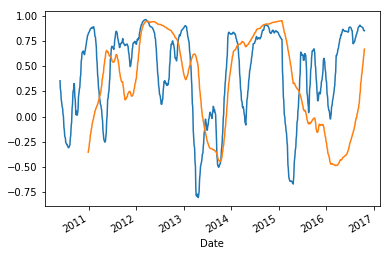

In [71]:
px=pd.read_pickle('ch05/yahoo_price.pkl')

aapl=px.AAPL
msft=px.MSFT

aapl.rolling(100).corr(msft).plot()
aapl.rolling(250).corr(msft).plot()

# 7. 고급numpy (간접정렬)

In [72]:
arr=np.arange(10)*100
idx=[5,3,6]

In [73]:
arr[idx] #1

array([500, 300, 600])

In [74]:
arr.take(idx)

array([500, 300, 600])

In [75]:
arr[idx]=[50,30,60]

In [79]:
arr.put(idx,[50,30,60]) # 위에도 되지만 지금하는 것이 성능이 더 좋다
arr

array([  0, 100, 200,  30, 400,  50,  60, 700, 800, 900])

In [83]:
a4=np.ones((2,3,4,5))
a4

array([[[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]],


       [[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]]])

In [84]:
desum=a4.sum(2)
a4.sum(2).shape

(2, 3, 5)

In [85]:
a4+desum[:,:,np.newaxis,:]

array([[[[5., 5., 5., 5., 5.],
         [5., 5., 5., 5., 5.],
         [5., 5., 5., 5., 5.],
         [5., 5., 5., 5., 5.]],

        [[5., 5., 5., 5., 5.],
         [5., 5., 5., 5., 5.],
         [5., 5., 5., 5., 5.],
         [5., 5., 5., 5., 5.]],

        [[5., 5., 5., 5., 5.],
         [5., 5., 5., 5., 5.],
         [5., 5., 5., 5., 5.],
         [5., 5., 5., 5., 5.]]],


       [[[5., 5., 5., 5., 5.],
         [5., 5., 5., 5., 5.],
         [5., 5., 5., 5., 5.],
         [5., 5., 5., 5., 5.]],

        [[5., 5., 5., 5., 5.],
         [5., 5., 5., 5., 5.],
         [5., 5., 5., 5., 5.],
         [5., 5., 5., 5., 5.]],

        [[5., 5., 5., 5., 5.],
         [5., 5., 5., 5., 5.],
         [5., 5., 5., 5., 5.],
         [5., 5., 5., 5., 5.]]]])

# 8. 시각나타내기

In [95]:
import datetime

In [97]:
n=datetime.datetime.now()

In [99]:
n

datetime.datetime(2018, 6, 25, 13, 38, 31, 47097)

In [100]:
n.strftime("%Y/%m/%d")

'2018/06/25'